100%|██████████| 10/10 [00:35<00:00,  3.53s/it]


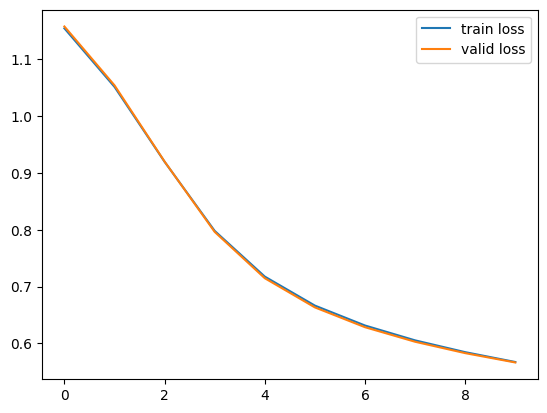

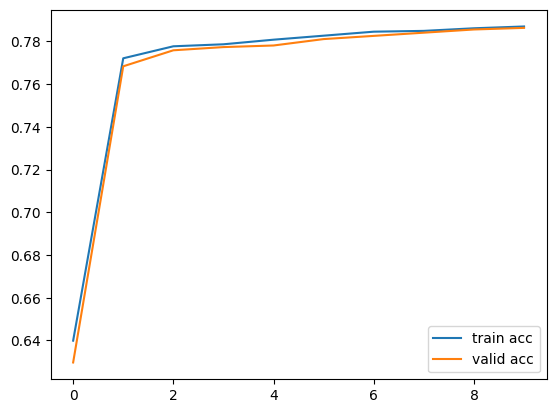

In [4]:
#No79(多層ニューラルネットワーク)
import torch
#時間の計測
import time
#データセットとデータローダ(データセットの中身をミニバッチごとに固めた集合)の作成に必要
from torch.utils.data import TensorDataset, DataLoader
#プログレスバーの表示
from tqdm import tqdm
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
torch.manual_seed(0)
#モデルの作成
class  LogisticRegression(torch.nn.Module):
    def __init__(self):
        super().__init__()
        #sequentialを使用すると多層化か容易にできる
        self.net = torch.nn.Sequential(torch.nn.Linear(300, 32),
            #活性化関数ReLU(x<0で0をとり、x≧0でxをとる関数。勾配消失が起こりにくい）
            torch.nn.ReLU(),
            #上層の出力サイズのサンプルサイズに合わせる
            torch.nn.Linear(32, 4),)
    def forward(self, X):
      return self.net(X)

model =  LogisticRegression()
#GPUを使う
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#model = model.to(device)

X_train = torch.load("/content/drive/MyDrive/X_train.pt")
y_train = torch.load("/content/drive/MyDrive/y_train.pt")
X_valid = torch.load("/content/drive/MyDrive/X_valid.pt")
y_valid = torch.load("/content/drive/MyDrive/y_valid.pt")
optimizer = torch.optim.SGD(model.net.parameters(), lr=0.01)
#損失関数の定義
loss_fn = torch.nn.CrossEntropyLoss()
batchsize = [32]

#データをタイトルとラベルの組ごとにタプルとして扱う
dataset = TensorDataset(X_train, y_train)

times = []

for bs in batchsize:
  #データローダの作成(ミニバッチの作成)
    loader = DataLoader(dataset, batch_size=bs, shuffle=True)
    train_losses = []
    valid_losses = []
    train_accs = []
    valid_accs = []

    for epoch in tqdm(range(10)):
        start = time.time()#時間計測スタート
        for xx, yy in loader:
          #勾配の初期化
            optimizer.zero_grad()
            y_pred = model(X_train)
          #パラメータの更新
            loss = loss_fn(y_pred, y_train)
          #勾配を計算(逆伝播)
            loss.backward()
          #パラメータの更新
            optimizer.step()

        #損失の記録
        train_losses.append(loss.detach().numpy())
        valid_losses.append(loss_fn(model(X_valid), y_valid).detach().numpy())
        #カテゴリの予測(指定した次元の最大値を返す)
        y_max_train, y_pred_train = torch.max(model(X_train),dim=1)
        y_max_valid, y_pred_valid = torch.max(model(X_valid),dim=1)
        #正解率の記録
        train_acc = accuracy_score(y_pred_train, y_train)
        valid_acc = accuracy_score(y_pred_valid, y_valid)
        train_accs.append(train_acc)
        valid_accs.append(valid_acc)

        #学習時間計測
        times.append(time.time() - start)


#損失の変化をプロット
fig = plt.figure()
plt.plot(train_losses, label="train loss")
plt.plot(valid_losses, label="valid loss")
plt.legend()#凡例
plt.savefig("/content/drive/MyDrive/knock79loss.png")

#正解率の変化をプロット
fig = plt.figure()
plt.plot(train_accs, label="train acc")
plt.plot(valid_accs, label="valid acc")
plt.legend()#凡例
plt.savefig("/content/drive/MyDrive/knock79acc.png")